In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3]:
data=pd.DataFrame(data)

In [4]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
data.isnull().sum()


tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
data_test.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [7]:
data["Activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


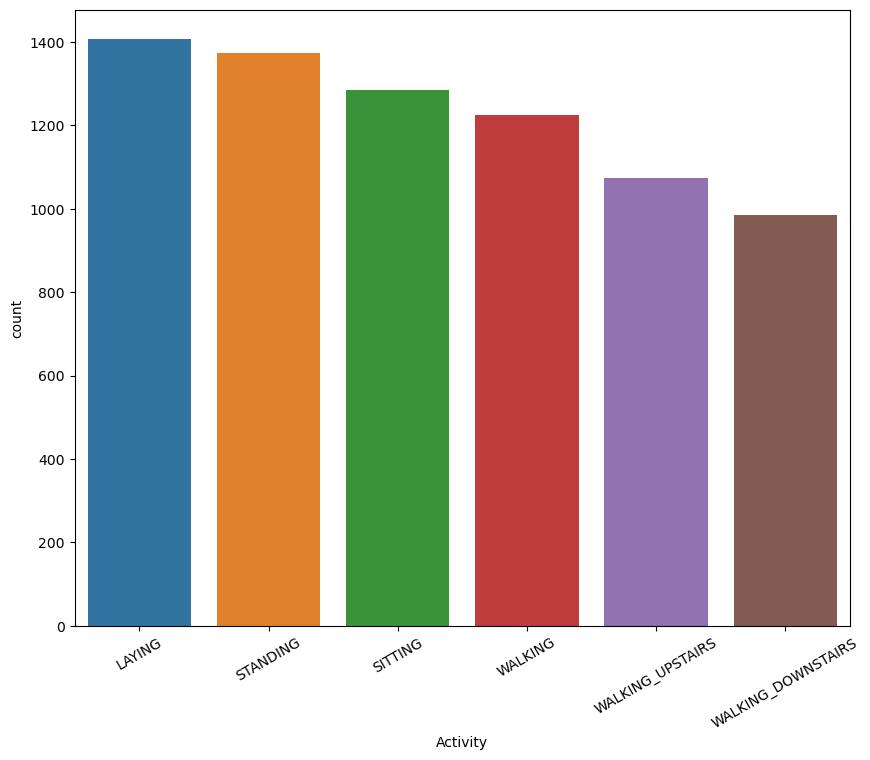

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x=data["Activity"],order=data["Activity"].value_counts().index)
plt.xticks(rotation=30)
plt.show()

In [10]:
#data.sort_values(by=["Activity"])
#sns.countplot(data=data,x=data["Activity"],order=data["Activity"].value_counts().index)

In [11]:
print("Train Dublicated:",sum(data.duplicated()))
print("test Dublicated:",sum(data_test.duplicated()))

Train Dublicated: 0
test Dublicated: 0


In [12]:
lst=[]
for i in data.columns:
    lst.append(i.split("-")[0].split("(")[0])

In [13]:
df=pd.DataFrame(lst)

In [14]:
category_count=df.value_counts()

In [15]:
category_count

fBodyAcc                79
fBodyAccJerk            79
fBodyGyro               79
tBodyAcc                40
tGravityAcc             40
tBodyGyroJerk           40
tBodyGyro               40
tBodyAccJerk            40
tBodyAccJerkMag         13
tBodyGyroMag            13
tBodyGyroJerkMag        13
tBodyAccMag             13
tGravityAccMag          13
fBodyBodyGyroMag        13
fBodyBodyGyroJerkMag    13
fBodyBodyAccJerkMag     13
fBodyAccMag             13
angle                    7
subject                  1
Activity                 1
dtype: int64

In [16]:
#pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient = "index").rename(columns = {0:'count'}).sort_values('count', ascending=False)


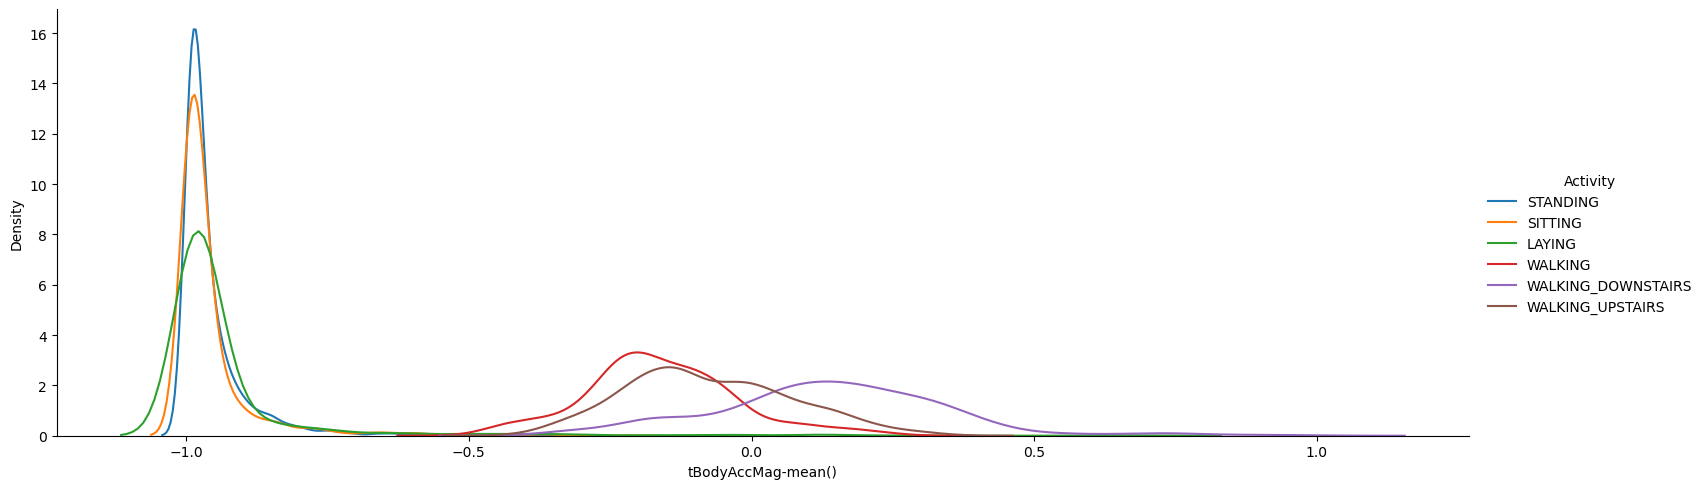

In [17]:
facetgrid = sns.FacetGrid(data, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

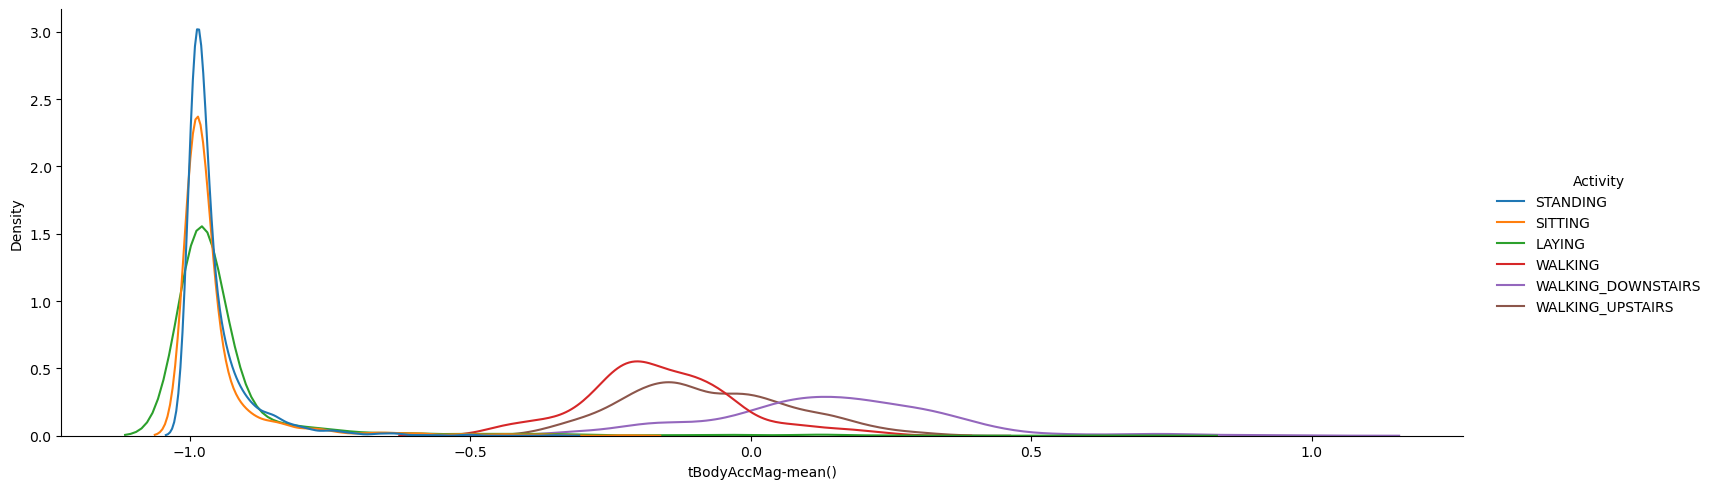

In [18]:
sns.displot(data,x="tBodyAccMag-mean()",hue="Activity",kind="kde",height = 5, aspect = 3)

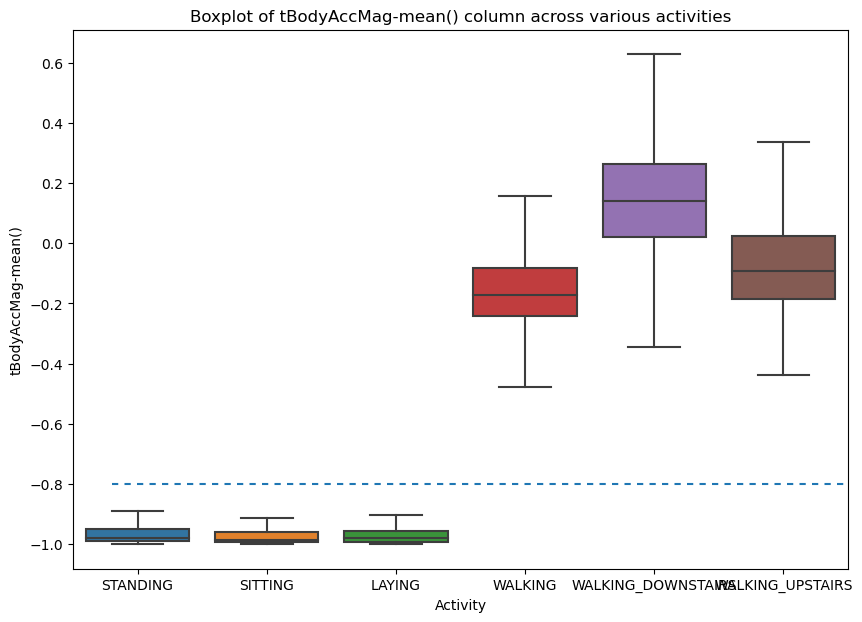

In [19]:
plt.figure(figsize=(10,7))
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = data, showfliers = False)
plt.axhline(y= -0.8, xmin = 0.05, dashes=(3,3))

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

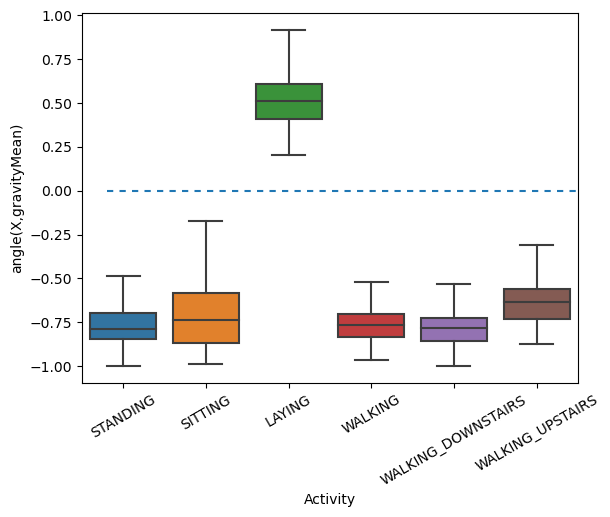

In [20]:
sns.boxplot(x = "Activity", y="angle(X,gravityMean)", data = data, showfliers = False)
plt.axhline(y= 0.0, xmin = 0.05, dashes=(3,3))
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

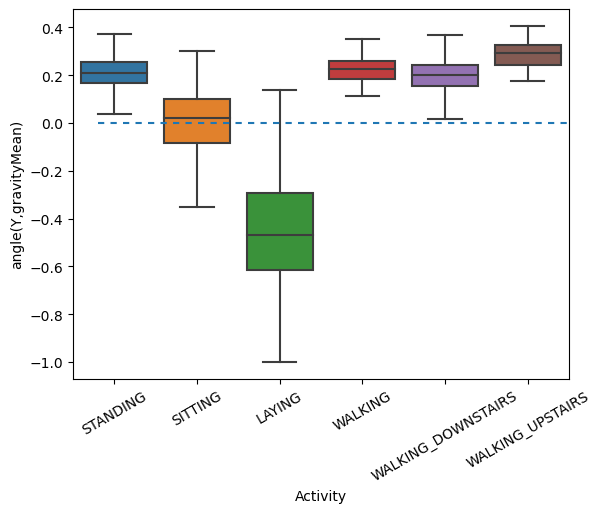

In [21]:
sns.boxplot(x = "Activity", y="angle(Y,gravityMean)", data = data, showfliers = False)
plt.axhline(y= 0.0, xmin = 0.05, dashes=(3,3))
plt.xticks(rotation=30)

In [22]:
x_train=data.drop(['subject', 'Activity'], axis = 1)
pca = PCA (n_components=2).fit(x_train).transform(x_train)


In [23]:
pca

array([[-5.5202803 , -0.2902774 ],
       [-5.53534954, -0.08253022],
       [-5.47498801,  0.28738705],
       ...,
       [ 5.85750527, -3.08184344],
       [ 5.42109482, -3.42643014],
       [ 5.49797027, -2.78992871]])

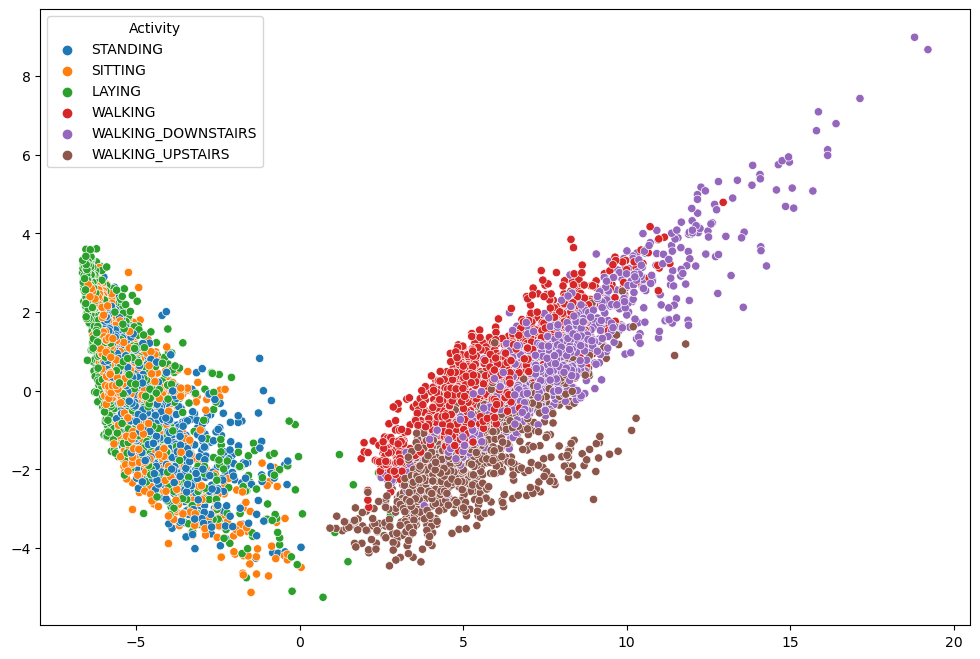

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = data['Activity'])
plt.show()

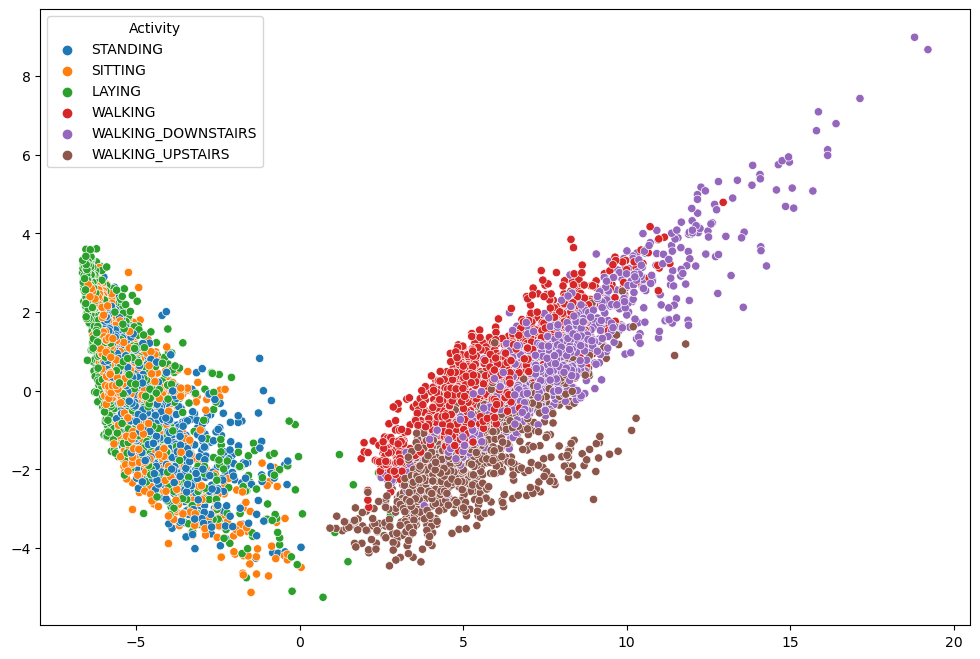

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = data['Activity'])
plt.show()

In [26]:
x_train=data.drop(['subject', 'Activity'], axis = 1)
y_train=data['Activity']
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_train)

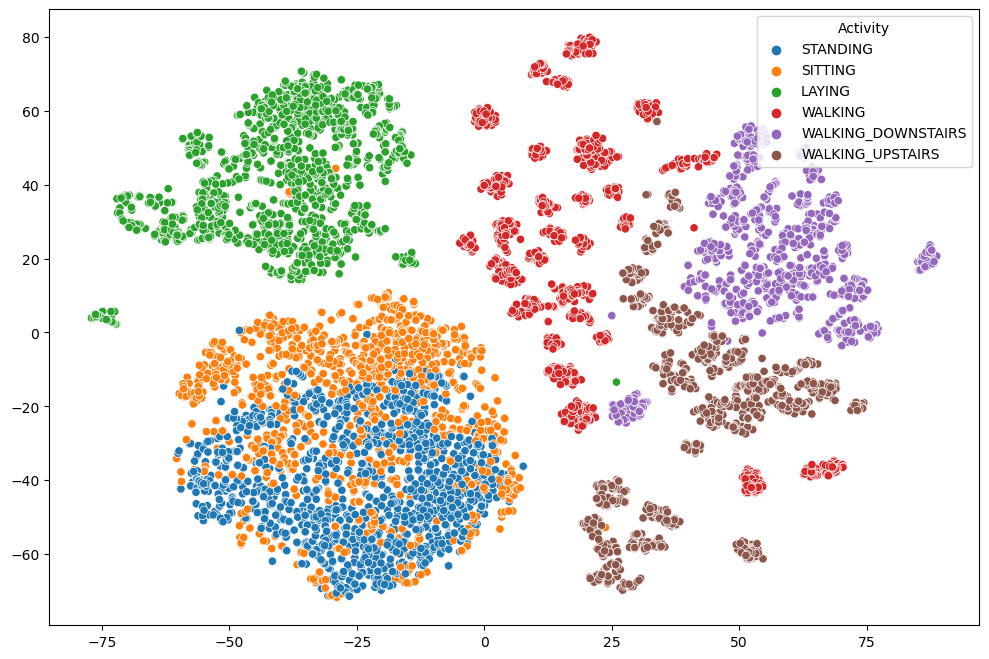

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = data['Activity'])
plt.show()

In [28]:
x_test=data_test.drop(['subject', 'Activity'], axis = 1)
y_test=data_test['Activity']

In [29]:
parameters={"max_iter":[100,300,500]}
lr_classifier=LogisticRegression()
lr_classifier_rs=RandomizedSearchCV(lr_classifier,parameters,cv = 5, random_state=42)
lr_classifier_rs.fit(x_train,y_train)
ed_lr=lr_classifier_rs.predict(x_test)

In [30]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=ed_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.954954954954955


In [31]:
cm=confusion_matrix(y_test,ed_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

In [32]:
print("Best estimator : ", lr_classifier_rs.best_estimator_)
print("Best set of parameters : ", lr_classifier_rs.best_params_)

Best estimator :  LogisticRegression(max_iter=500)
Best set of parameters :  {'max_iter': 500}


In [33]:
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

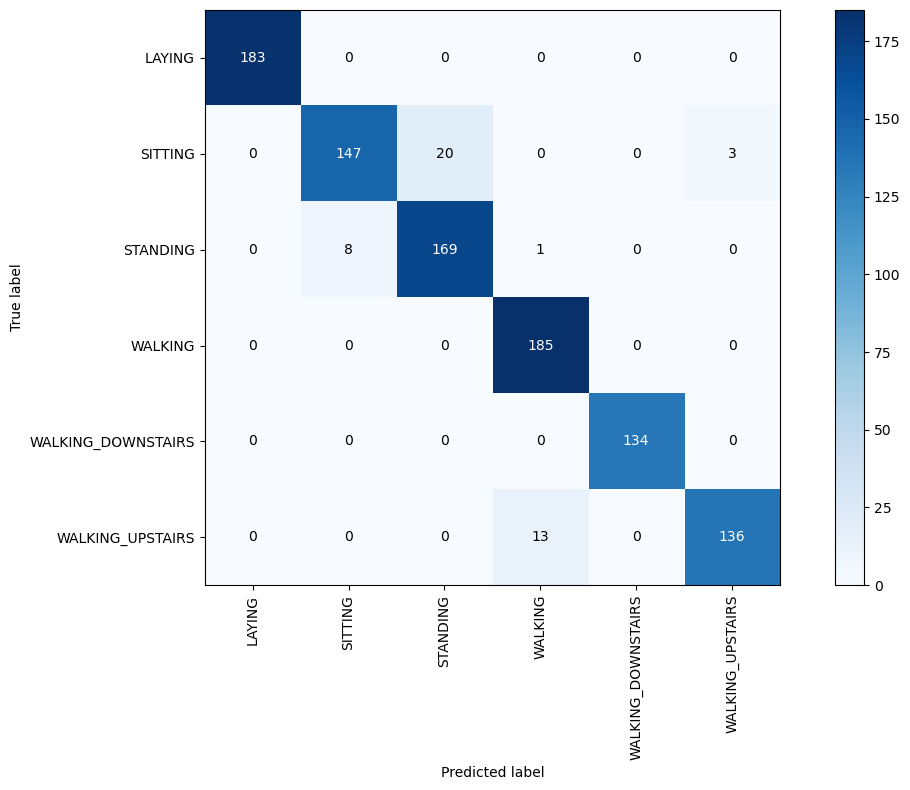

In [34]:
cm = confusion_matrix(y_test.values,ed_lr)
plot_confusion_matrix(cm, np.unique(ed_lr))

In [50]:
parameters={
    "kernel":['linear','polynomial','rbf','sigmoid'],
    "C":[100,50,5000]
}
svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state=42)
svm_rs.fit(x_train, y_train)
y_pred = svm_rs.predict(x_test)

In [51]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.9679679679679679


In [52]:
cm = confusion_matrix(y_test.values,y_pred)
cm


array([[183,   0,   0,   0,   0,   0],
       [  0, 149,  19,   0,   0,   2],
       [  0,   5, 173,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   6,   0, 143]], dtype=int64)

In [54]:
print("Best estimator : ", svm_rs.best_estimator_)
print("Best set of parameters : ", svm_rs.best_params_)

Best estimator :  SVC(C=100)
Best set of parameters :  {'kernel': 'rbf', 'C': 100}


In [57]:
parameters = {'max_depth': np.arange(2, 10, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(x_train, y_train)
y_pred = dt_classifier_rs.predict(x_test)
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)
cm = confusion_matrix(y_test.values,y_pred)
cm

Accuracy using Decision tree :  0.8568568568568569


array([[183,   0,   0,   0,   0,   0],
       [  0, 110,  60,   0,   0,   0],
       [  0,  28, 150,   0,   0,   0],
       [  0,   0,   0, 182,   3,   0],
       [  0,   0,   0,   6, 125,   3],
       [  0,   0,   0,  32,  11, 106]], dtype=int64)

In [60]:
parameters = {
    'n_estimators':np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(x_train, y_train)
y_pred = rf_classifier_rs.predict(x_test)
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)
cm = confusion_matrix(y_test.values,y_pred)


Accuracy using Random forest :  0.923923923923924


In [61]:
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 142,  28,   0,   0,   0],
       [  0,  25, 153,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   7, 127,   0],
       [  0,   0,   0,  15,   1, 133]], dtype=int64)

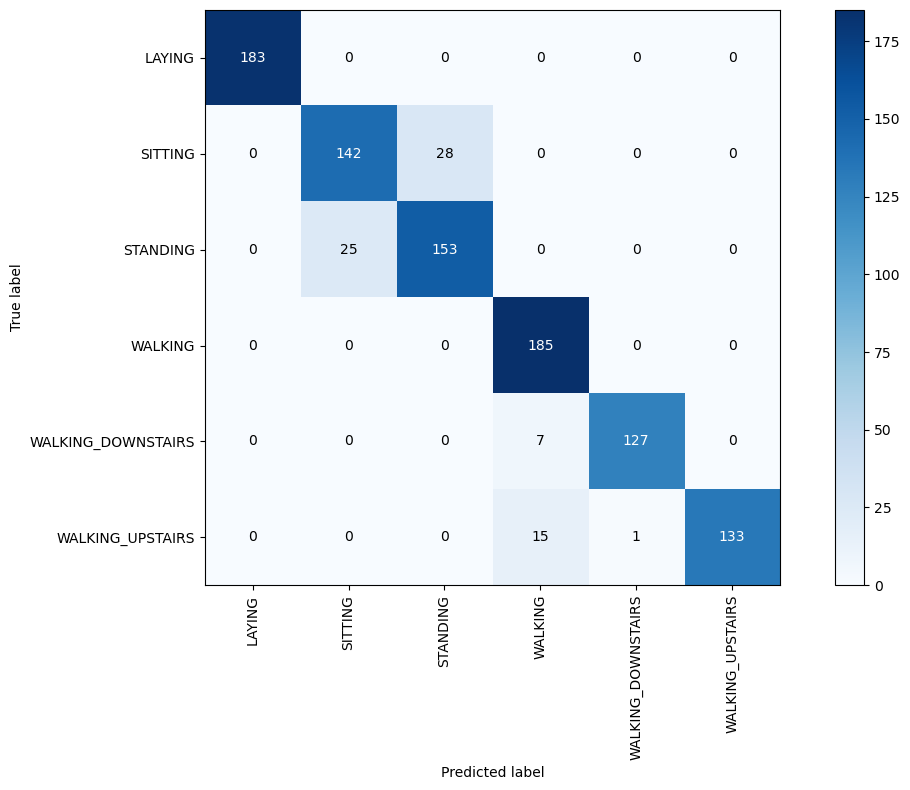

In [62]:
plot_confusion_matrix(cm, np.unique(y_pred))
